<h1>Ecommerce Data Analysis</h1>

<h1>Objective :</h1>
The objective of this data analysis project is to gain insights into the ecommerce order data of a fictional company. We will analyze customer information, product details, an order history to derive meaningful conclusions that can aid business decision-making.

In [1]:
#Import necessary libraries for MySQL connection, data manipulation and visualization
import mysql.connector  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Connect to mysql
connection=mysql.connector.connect(
    host='localhost', 
    user='root', #My user name
    password='12345', #My password
    database='ecommerce' #The database from where I want to fetch the data
)

In [3]:
#Create a cursor object for executing SQL queries on the database using the 'connection' object
cursor = connection.cursor()

In [4]:
#Execute the SQL SELECT query to fetch all records from the 'product', 'order' and 'cutomer' table from the dataset 'Ecommerce'
#using the 'cursor' object and then create there dataframe
cursor.execute("select * from product")
product_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from order_details")
order_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])  

cursor.execute("select * from customer")
customer_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description]) 

In [5]:
#Execute a complex SQL SELECT query to retrieve customer, order, and product details using LEFT JOINs
cursor.execute("""SELECT c.customer_id, c.name AS customer_name, c.city, c.email, c.phone_no, c.address, c.pin_code,
    o.order_id, o.product_id, o.quantity, o.total_price, o.payment_mode, o.order_date, o.order_status,
    p.product_name, p.category, p.sub_category, p.original_price, p.selling_price FROM customer c
    LEFT JOIN order_details o ON c.customer_id = o.customer_id
    LEFT JOIN product p ON o.product_id = p.product_id """)

#Create a DataFrame 'ecommerce_df' using the fetched results and column names from the cursor's description
ecommerce_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [6]:
#Close the connection and cursor
cursor.close()
connection.close()

In [7]:
#Display the first few rows of the Product Table from Ecommerce.
product_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [8]:
#Display the first few rows of the Order Table from Ecommerce.
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [9]:
#Display the first few rows of the Customer Table from Ecommerce.
customer_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [10]:
#Display the first few rows of the ecommece Table from Ecommerce database.
ecommerce_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,NaN,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,NaN,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.0,P105,1.0,450.0,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.0,450.0
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.0,P103,1.0,55000.0,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.0,55000.0
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.0,P112,1.0,1000.0,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.0,800.0


<h1>Data Cleaning :</h1>

<h2>Product Table</h2>

In [11]:
#Display the shape (number of rows and columns) of the 'product_df' DataFrame
product_df.shape

(61, 7)

In [12]:
#Display information about the 'product_df' DataFrame, including data types and memory usage
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [13]:
#Show information/description for the 'product_df' data like mean, min, max, etc.
product_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


In [14]:
#Show that ,to give description from the columns in the Product Table which contain object data types.
product_df.describe(include=object)

,product_id,product_name,category,sub_category
count,61,61,61,61
unique,61,43,4,22
top,P102,Tablet,Electronics,Electronics
freq,1,4,32,20


In [15]:
#Count the occurrences of each unique value in the 'category' column of the product_df DataFrame
#This helps to understand the distribution and frequency of different categories in the dataset
product_df['category'].value_counts() 

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64

In [16]:
#Replace occurrences of 'furniture' with 'Furniture' in the 'category' column of the product_df DataFrame
product_df['category'] = product_df['category'].replace('furniture','Furniture')  
#Display the updated distribution of values in the 'category' column after the replacement
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64

In [17]:
#Count the number of missing values in each column of the 'product_df' DataFrame
product_df.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

In [18]:
product_df.duplicated().value_counts()

False    61
Name: count, dtype: int64

<h2>Order Table</h2>

In [19]:
#Display the shape (number of rows and columns) of the 'order_df' DataFrame
order_df.shape

(76, 8)

In [20]:
#Display information about the 'order_df' DataFrame, including data types and memory usage
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


In [21]:
#Show information/description for the 'order_df' data like mean, min, max, etc.
order_df.describe()

,order_id,quantity,total_price,order_date
count,76.000000,76.000000,76.000000,76
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00
std,28.673660,0.558664,18442.574791,NaN


In [22]:
#Show that ,to give description from the columns in the Order Table which contain object data types.
order_df.describe(include=object)

,customer_id,product_id,payment_mode,order_status
count,76,76,76,76
unique,59,58,2,6
top,C1013,P102,Online,Delivered
freq,3,3,43,27


In [23]:
#Count the occurrences of each unique value in the 'payment_mode' column of the order_df DataFrame
#This helps to understand the distribution and frequency of different Payment Mode in the dataset
order_df['payment_mode'].value_counts()

payment_mode
Online    43
COD       33
Name: count, dtype: int64

In [24]:
#Count the occurrences of each unique value in the 'order_status' column of the order_df DataFrame
#This helps to understand the distribution and frequency of different Order Status in the dataset
order_df['order_status'].value_counts()

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64

In [25]:
#Replace occurrences of 'delivered' with 'Delivered' in the 'order_status' column of the order_df DataFrame
order_df['order_status'] = order_df['order_status'].replace('delivered','Delivered')
#Display the updated distribution of values in the 'order_status' column after the replacement
order_df['order_status'].value_counts()

order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64

In [26]:
#Count the number of missing values in each column of the 'order_df' DataFrame
order_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [27]:
#Count the number of duplicated rows in the 'order_df' DataFrame
order_df.duplicated().value_counts()

False    76
Name: count, dtype: int64

<h2>Customer Table</h2>

In [28]:
#Display the shape (number of rows and columns) of the 'customer_df' DataFrame
customer_df.shape

(62, 7)

In [29]:
#Display information about the 'customer_df' DataFrame, including data types and memory usage
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [30]:
#Show information/description for the 'customer_df' data like mean, min, max, etc.
customer_df.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


In [31]:
#Show that ,to give description from the columns in the Customer Table which contain object data types.
customer_df.describe(include=object)

,customer_id,name,city,email,phone_no,address
count,62,62,62,62,62,62
unique,62,39,4,52,26,57
top,C1001,Ava,Tokyo,henry@gmail.com,1234567890,oo.pp.road
freq,1,4,22,3,11,2


In [32]:
#Count the occurrences of each unique value in the 'city' column of the customer_df DataFrame
#This helps to understand the distribution and frequency of different cities in the dataset
customer_df['city'].value_counts()

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64

In [33]:
#Count the number of missing values in each column of the 'customer_df' DataFrame
customer_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [34]:
#Count the number of duplicated rows in the 'customer_df' DataFrame
customer_df.duplicated().sum()

0

In [35]:
customer_df.duplicated().value_counts()

False    62
Name: count, dtype: int64

<h2>Ecommerce Table</h2>

In [36]:
#Display the shape (number of rows and columns) of the 'ecommerce_df' DataFrame
ecommerce_df.shape

(79, 19)

In [37]:
#Display information about the 'ecommerce_df' DataFrame, including data types and memory usage
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     79 non-null     object        
 1   customer_name   79 non-null     object        
 2   city            79 non-null     object        
 3   email           79 non-null     object        
 4   phone_no        79 non-null     object        
 5   address         79 non-null     object        
 6   pin_code        79 non-null     int64         
 7   order_id        76 non-null     float64       
 8   product_id      76 non-null     object        
 9   quantity        76 non-null     float64       
 10  total_price     76 non-null     float64       
 11  payment_mode    76 non-null     object        
 12  order_date      76 non-null     datetime64[ns]
 13  order_status    76 non-null     object        
 14  product_name    76 non-null     object        
 15  category

In [38]:
#Show information/description for the 'ecommerce_df' data like mean, min, max, etc.
ecommerce_df.describe()

,pin_code,order_id,quantity,total_price,order_date,original_price,selling_price
count,79.000000,76.000000,76.000000,76.000000,76,76.000000,76.000000
mean,38247.189873,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016,20019.736842,16973.684211
min,99.000000,3.000000,1.000000,450.000000,2023-11-23 00:00:00,500.000000,450.000000
25%,12345.000000,22.750000,1.000000,6500.000000,2024-01-02 18:00:00,6000.000000,5000.000000
50%,32830.000000,57.500000,1.000000,16500.000000,2024-02-12 12:00:00,15000.000000,12000.000000
75%,56789.000000,76.250000,2.000000,30000.000000,2024-03-02 06:00:00,30000.000000,25000.000000
max,98766.000000,95.000000,3.000000,90000.000000,2024-03-21 00:00:00,80000.000000,70000.000000
std,29304.160483,28.673660,0.558664,18442.574791,NaN,17749.824561,15712.153414


In [39]:
#Show that ,to give description from the columns in the Ecommerce Table which contain object data types.
ecommerce_df.describe(include=object)

,customer_id,customer_name,city,email,phone_no,address,product_id,payment_mode,order_status,product_name,category,sub_category
count,79,79,79,79,79,79,76,76,76,76,76,76
unique,62,39,4,52,26,57,58,2,6,40,4,20
top,C1013,Mia,Kanagawa,mia@example.com,1234567890,pqr street,P102,Online,Delivered,Tablet,Electronics,Electronics
freq,3,5,25,4,12,4,3,43,27,5,34,27


In [40]:
#Count the occurrences of each unique value in the 'city' column of the ecommerce_df DataFrame
#This helps to understand the distribution and frequency of different cities in the dataset
ecommerce_df['city'].value_counts()

city
Kanagawa            25
Tokyo               24
Sydney              15
Lake Buena Vista    15
Name: count, dtype: int64

In [41]:
#Count the occurrences of each unique value in the 'quantity' column of the ecommerce_df DataFrame
#This helps to understand the distribution and frequency of different Quantities in the dataset
ecommerce_df['quantity'].value_counts()

quantity
1.0    52
2.0    21
3.0     3
Name: count, dtype: int64

In [42]:
#Count the duplicated rows in the 'ecommerce_df' DataFrame
ecommerce_df.duplicated().value_counts()

False    79
Name: count, dtype: int64

In [43]:
#Count the number of missing values in each column of the 'ecommerce_df' DataFrame
ecommerce_df.isnull().sum()

customer_id       0
customer_name     0
city              0
email             0
phone_no          0
address           0
pin_code          0
order_id          3
product_id        3
quantity          3
total_price       3
payment_mode      3
order_date        3
order_status      3
product_name      3
category          3
sub_category      3
original_price    3
selling_price     3
dtype: int64

In [44]:
#Calculate then print the mean of the 'order_id' column in the 'ecommerce_df' Dataframe
ecommerce_df_mean=ecommerce_df['order_id'].mean()
print(ecommerce_df_mean)

51.14473684210526


In [45]:
#Fill missing values in the 'order_id' column of 'ecommerce_df' with the mean value
ecommerce_df['order_id'].fillna(ecommerce_df_mean,inplace=True)

In [46]:
#Count the non-null and null values in the 'order_id' column of 'ecommerce_df'
ecommerce_df['order_id'].isnull().value_counts()

order_id
False    79
Name: count, dtype: int64

In [47]:
#Count the number of missing values in the 'product_id' column of 'ecommerce_df'
ecommerce_df['product_id'].isnull().sum()

3

In [48]:
#Display rows in 'ecommerce_df' where the 'product_id' column has missing values
ecommerce_df[ecommerce_df['product_id'].isnull()]

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
10,C1007,lilly,Tokyo,lilly@gmail.com,4567234567,f.c.road,56789,51.144737,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN


In [49]:
#Fill missing values in the 'product_id' column of 'ecommerce_df' with 'P000'
ecommerce_df['product_id'].fillna(value='P000',inplace=True)

In [50]:
#Count the occurrences of non-null and null values in the 'product_id' column.
ecommerce_df['product_id'].isnull().value_counts()

product_id
False    79
Name: count, dtype: int64

In [51]:
#Count the non-null and null values in the 'quantity' column.
ecommerce_df['quantity'].isnull().value_counts()

quantity
False    76
True      3
Name: count, dtype: int64

In [52]:
#Fill missing values in the 'quantity' column with the mean value of the column.
ecommerce_df['quantity'].fillna(ecommerce_df['quantity'].mean(),inplace=True)

In [53]:
#Count the occurrences of non-null and null values in the 'quantity' column of 'ecommerce_df'
ecommerce_df['quantity'].isnull().value_counts()

quantity
False    79
Name: count, dtype: int64

In [54]:
#Count the occurrences of non-null and null values in the 'total_price' column of 'ecommerce_df'
ecommerce_df['total_price'].isnull().value_counts()

total_price
False    76
True      3
Name: count, dtype: int64

In [55]:
#Fill missing values in the 'total_price' column with the mean value of the column.
ecommerce_df['total_price'].fillna(ecommerce_df['total_price'].mean(),inplace=True)

In [56]:
#Count the occurrences of non-null and null values in the 'total_price' column.
ecommerce_df['total_price'].isnull().value_counts()

total_price
False    79
Name: count, dtype: int64

In [57]:
#Count the occurrences of non-null and null values in the 'payment_mode' column.
ecommerce_df['payment_mode'].isnull().value_counts()

payment_mode
False    76
True      3
Name: count, dtype: int64

In [58]:
#Display rows in 'ecommerce_df' where the 'payment_mode' column has missing values
ecommerce_df[ecommerce_df['payment_mode'].isnull()]

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,None,NaT,None,None,None,None,NaN,NaN
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,None,NaT,None,None,None,None,NaN,NaN
10,C1007,lilly,Tokyo,lilly@gmail.com,4567234567,f.c.road,56789,51.144737,P000,1.355263,20873.684211,None,NaT,None,None,None,None,NaN,NaN


In [59]:
#Create a pivot table to count each payment mode in 'ecommerce_df'
pd.pivot_table(ecommerce_df,index=['payment_mode'],aggfunc=["count"])

count                                                           \
             address category city customer_id customer_name email order_date   
payment_mode                                                                    
COD               33       33   33          33            33    33         33   
Online            43       43   43          43            43    43         43   

                                                                     \
             order_id order_status original_price phone_no pin_code   
payment_mode                                                          
COD                33           33             33       33       33   
Online             43           43             43       43       43   

                                                                          \
             product_id product_name quantity selling_price sub_category   
payment_mode                                                               
COD                  33           33       33            33           33   
Online               43           43       43            43           43   

                          
             total_price  
payment_mode              
COD                   33  
Online                43

In [60]:
#Backfill (filling NaN values with the next valid value) in the 'payment_mode' column of 'ecommerce_df'
ecommerce_df['payment_mode'].bfill(inplace=True)

In [61]:
#Count the occurrences of non-null and null values in the 'payment_mode' column of 'ecommerce_df'
ecommerce_df['payment_mode'].isnull().value_counts()

payment_mode
False    79
Name: count, dtype: int64

In [62]:
#Count the number of missing values in the 'order_date' column of 'ecommerce_df'
ecommerce_df['order_date'].isnull().sum()

3

In [63]:
#Backfill (filling NaN values with the next valid value) in the 'order_date' column of 'ecommerce_df'
ecommerce_df['order_date'].bfill(inplace=True)

In [64]:
#Count the occurrences of non-null and null values in the 'order_date' column of 'ecommerce_df'
ecommerce_df['order_date'].isnull().value_counts()

order_date
False    79
Name: count, dtype: int64

In [65]:
#Create a pivot table to count each order status in 'ecommerce_df'
pd.pivot_table(ecommerce_df,index=['order_status'],aggfunc=['count'])

count                                                           \
             address category city customer_id customer_name email order_date   
order_status                                                                    
Cancelled          6        6    6           6             6     6          6   
Delivered         27       27   27          27            27    27         27   
Pending           25       25   25          25            25    25         25   
Returned           1        1    1           1             1     1          1   
Shipped           16       16   16          16            16    16         16   
delivered          1        1    1           1             1     1          1   

                                                                     \
             order_id original_price payment_mode phone_no pin_code   
order_status                                                          
Cancelled           6              6            6        6        6   
Delivered          27             27           27       27       27   
Pending            25             25           25       25       25   
Returned            1              1            1        1        1   
Shipped            16             16           16       16       16   
delivered           1              1            1        1        1   

                                                                          \
             product_id product_name quantity selling_price sub_category   
order_status                                                               
Cancelled             6            6        6             6            6   
Delivered            27           27       27            27           27   
Pending              25           25       25            25           25   
Returned              1            1        1             1            1   
Shipped              16           16       16            16           16   
delivered             1            1        1             1            1   

                          
             total_price  
order_status              
Cancelled              6  
Delivered             27  
Pending               25  
Returned               1  
Shipped               16  
delivered              1

In [66]:
#Count the non-null and null values in the 'order_status' column of 'ecommerce_df'
ecommerce_df['order_status'].isnull().value_counts()

order_status
False    76
True      3
Name: count, dtype: int64

In [67]:
#Backfill (filling NaN values with the next valid value) in the 'order_status' column of 'ecommerce_df'
ecommerce_df['order_status'].bfill(inplace=True)

In [68]:
#Count the non-null and null values in the 'order_status' column of 'ecommerce_df'
ecommerce_df['order_status'].isnull().value_counts()

order_status
False    79
Name: count, dtype: int64

In [69]:
#Count the non-null and null values in the 'product_name' column of 'ecommerce_df'
ecommerce_df['product_name'].isnull().value_counts()

product_name
False    76
True      3
Name: count, dtype: int64

In [70]:
print(ecommerce_df['product_name'].dtype)

object


In [71]:
ecommerce_df['product_name'].fillna(value='Unknown Product',inplace=True)

In [72]:
#Count the non-null and null values in the 'order_status' column of 'ecommerce_df'
ecommerce_df['product_name'].isnull().value_counts()

product_name
False    79
Name: count, dtype: int64

In [73]:
#Count the non-null and null values in the 'category' column of 'ecommerce_df'
ecommerce_df['category'].isnull().value_counts()

category
False    76
True      3
Name: count, dtype: int64

In [74]:

ecommerce_df['category'].dtype

dtype('O')

In [75]:
#Create a pivot table to count each category in 'ecommerce_df'
pd.pivot_table(ecommerce_df,index=['category'],aggfunc='count')

,address,city,customer_id,customer_name,email,order_date,order_id,order_status,original_price,payment_mode,phone_no,pin_code,product_id,product_name,quantity,selling_price,sub_category,total_price
category,,,,,,,,,,,,,,,,,,
Appliance,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Electronics,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Furniture,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
furniture,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [76]:
ecommerce_df['category'].fillna(value='Unknown',inplace=True)

In [77]:
#Create a pivot table to count each category in 'ecommerce_df'
pd.pivot_table(ecommerce_df,index=['category'],aggfunc='count')

,address,city,customer_id,customer_name,email,order_date,order_id,order_status,original_price,payment_mode,phone_no,pin_code,product_id,product_name,quantity,selling_price,sub_category,total_price
category,,,,,,,,,,,,,,,,,,
Appliance,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Electronics,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Furniture,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Unknown,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,0,0,3
furniture,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [78]:
ecommerce_df['category'] = ecommerce_df['category'].replace('furniture','Furniture')

In [79]:
#Create a pivot table to count each category in 'ecommerce_df'
pd.pivot_table(ecommerce_df,index=['category'],aggfunc='count')

,address,city,customer_id,customer_name,email,order_date,order_id,order_status,original_price,payment_mode,phone_no,pin_code,product_id,product_name,quantity,selling_price,sub_category,total_price
category,,,,,,,,,,,,,,,,,,
Appliance,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Electronics,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Furniture,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Unknown,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,0,0,3


In [80]:
#Count the non-null and null values in the 'category' column of 'ecommerce_df'
ecommerce_df['category'].isnull().value_counts()

category
False    79
Name: count, dtype: int64

In [81]:
#Count the non-null and null values in the 'sub_category' column of 'ecommerce_df'
ecommerce_df['sub_category'].isnull().value_counts()

sub_category
False    76
True      3
Name: count, dtype: int64

In [82]:
print(ecommerce_df['sub_category'].dtype)

object


In [83]:
ecommerce_df['sub_category'].fillna(value='Not Mention',inplace=True)

In [84]:
#Count the non-null and null values in the 'sub_category' column of 'ecommerce_df'
ecommerce_df['sub_category'].isnull().value_counts()

sub_category
False    79
Name: count, dtype: int64

In [85]:
#Fill missing values in the 'original_price' column of 'ecommerce_df' with the mean value of the column
ecommerce_df['original_price'].fillna(ecommerce_df['original_price'].mean(),inplace=True)

In [86]:
#Count the non-null and null values in the 'original_price' column of 'ecommerce_df'
ecommerce_df['original_price'].isnull().value_counts()

original_price
False    79
Name: count, dtype: int64

In [87]:
#Fill missing values in the 'selling_price' column of 'ecommerce_df' with the mean value of the column
ecommerce_df['selling_price'].fillna(ecommerce_df['selling_price'].mean(),inplace=True)

In [88]:
# Count the non-null and null values in the 'selling_price' column of 'ecommerce_df'
ecommerce_df['selling_price'].isnull().value_counts()

selling_price
False    79
Name: count, dtype: int64

In [89]:
#Display information about the 'ecommerce_df' DataFrame, including data types and memory usage.
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     79 non-null     object        
 1   customer_name   79 non-null     object        
 2   city            79 non-null     object        
 3   email           79 non-null     object        
 4   phone_no        79 non-null     object        
 5   address         79 non-null     object        
 6   pin_code        79 non-null     int64         
 7   order_id        79 non-null     float64       
 8   product_id      79 non-null     object        
 9   quantity        79 non-null     float64       
 10  total_price     79 non-null     float64       
 11  payment_mode    79 non-null     object        
 12  order_date      79 non-null     datetime64[ns]
 13  order_status    79 non-null     object        
 14  product_name    79 non-null     object        
 15  category

<h1>Exploratory Data Analysis (EDA) and Visualization :</h1>

<h2>Customer Analysis :</h2>

<h3>1.Identify the total number of customers City wise</h3>

In [90]:
#Display the first few rows of the Customer Table from Ecommerce
customer_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [91]:
#Show that ,to give description from the columns in the Customer Table which contain object data types.
customer_df.describe(include=object)

,customer_id,name,city,email,phone_no,address
count,62,62,62,62,62,62
unique,62,39,4,52,26,57
top,C1001,Ava,Tokyo,henry@gmail.com,1234567890,oo.pp.road
freq,1,4,22,3,11,2


In [92]:
# Create a pivot table 'customer_city_pt' to count the number of customers in each city using 'customer_df'
customer_city_pt=pd.pivot_table(customer_df,index=['city'],values=['customer_id'],aggfunc=['count'])
# Rename columns to simplify DataFrame structure
customer_city_pt.columns = customer_city_pt.columns.get_level_values(1)
# Sort the pivot table by the number of customers in each city in descending order
customer_city_pt_sorted = customer_city_pt.sort_values(by='customer_id', ascending=False)
print(customer_city_pt_sorted)

                  customer_id
city                         
Tokyo                      22
Kanagawa                   18
Sydney                     12
Lake Buena Vista           10


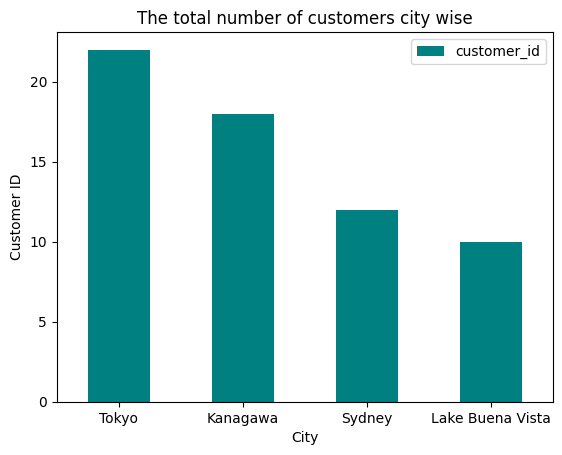

In [93]:
#Create a bar plot to visualize the total number of customers city-wise
customer_city_pt_sorted.plot(kind='bar',color='Teal')
plt.title("The total number of customers city wise")
plt.xlabel("City")
plt.xticks(rotation=0)
plt.ylabel("Customer ID")
plt.show()

**Customer Count Comparison across Four Cities**

This bar chart provides a comparison of the customer count across four cities.

1. **Tokyo:** 22 customers
2. **Kanagawa:** 18 customers
3. **Sydney:** 12 customers
4. **Lake Buena Vista:** 10 customers

This data suggests that the business is most popular in **Tokyo** and least popular in **Lake Buena Vista**.


<h3>2.Identify the most frequent customers based on their order history</h3>

In [94]:
#Display the first few rows of the 'order_df' DataFrame
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,Delivered


In [95]:
#Create a pivot table to count each customer's orders in 'order_df'
pd.pivot_table(order_df,index=['customer_id'],values=['quantity'],aggfunc=['count'])

,count
,quantity
customer_id,
C1003,2
C1004,1
C1005,3
C1006,2
C1008,2
C1009,3
C1010,3
C1011,2


In [96]:
#Create a pivot table to count of each customer's orders in 'order_df' and select the top 10 customers
top_10_customers=pd.pivot_table(order_df,index=['customer_id'],values=['quantity'],aggfunc=['count']).nlargest(10,('count','quantity'))
print(top_10_customers) 

               count
            quantity
customer_id         
C1005              3
C1009              3
C1010              3
C1013              3
C1003              2
C1006              2
C1008              2
C1011              2
C1014              2
C1015              2


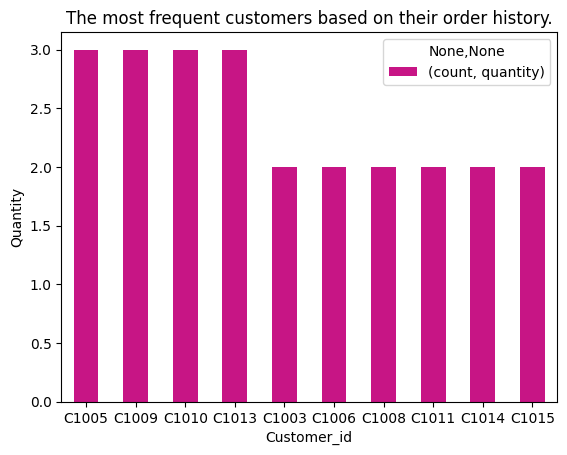

In [97]:
#Create a bar plot to visualize the most frequent customers based on their order history.
top_10_customers.plot(kind='bar',color='MediumVioletRed')
plt.title("The most frequent customers based on their order history.")
plt.xlabel("Customer_id")
plt.xticks(rotation=0)
plt.ylabel("Quantity")
plt.show()

**Overview of Number of Orders by Top 10 Customers**

This bar chart provides an overview of the number of orders placed by the top 10 customers.

- **Customers with 3 orders each:**
    - C1013
    - C1010
    - C1005
    - C1009

- **Customers with 2 orders each:**
    - C0317
    - C0816
    - C0615
    - C1114
    - C1411
    - C1519

This data suggests that customers C1013, C1010, C1005, and C1009 are the most frequent customers with 3 orders each.


<h2>Product Analysis : </h2>

<h3>1.Determine the total number of products available by category</h3>

In [98]:
#Display the first few rows of the 'product_df' DataFrame
product_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,Furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [99]:
#Create a pivot table to count the occurrences of each product category in 'product_df'
category_wise_product=pd.pivot_table(product_df,index=['category'],values=['product_name'],aggfunc='count')
print(category_wise_product)

             product_name
category                 
Appliance              20
Electronics            32
Furniture               9


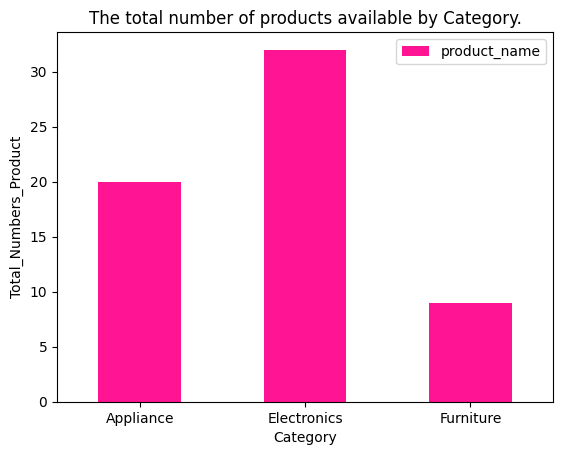

In [100]:
#Create a bar plot to visualize the total number of products available by category
category_wise_product.plot(kind='bar',color='DeepPink')
plt.title("The total number of products available by Category.")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.ylabel("Total_Numbers_Product")
plt.show()

**Distribution of Products across Categories**

The bar chart presents the distribution of products across three categories: Electronics, Appliance, and Furniture.

- **Electronics:** 32 products
- **Appliance:** 20 products
- **Furniture:** 9 products

In conclusion, Electronics is the most populated category, while Furniture has the fewest products.


<h3>2.Analyze the distribution of products across sub-categories </h3>

In [101]:
#Create a pivot table to count the occurrences of each product sub-category in 'product_df'
sub_category_wise_product=pd.pivot_table(product_df,index=['sub_category'],values=['product_name'],aggfunc='count')
print(sub_category_wise_product)

               product_name
sub_category               
Accessories               2
Audio                     3
Cameras                   1
Chairs                    2
Computers                 9
Consoles                  1
Desks                     1
Electronics              20
Entertainment             3
Furniture                 1
Lamps                     2
Mobiles                   1
Photography               1
Printers                  1
Sofas                     1
TVs                       1
Tables                    1
Tablets                   2
Wearables                 5
chairs                    1
computer                  1
phone                     1


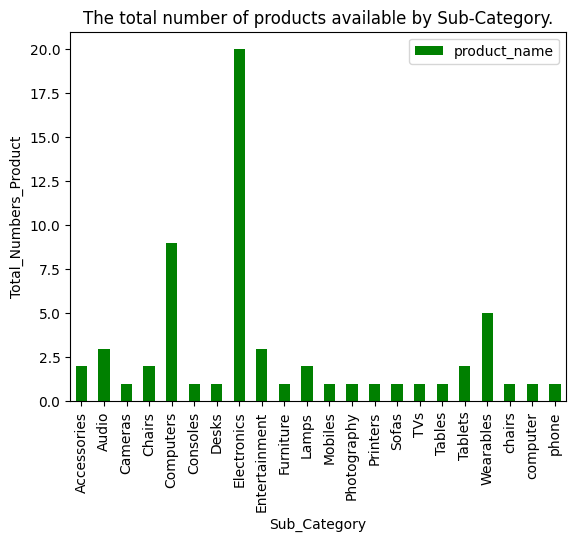

In [102]:
#Create a bar plot to visualize the total number of products available by sub-category.
sub_category_wise_product.plot(kind='bar',color='Green')
plt.title("The total number of products available by Sub-Category.")
plt.xlabel("Sub_Category")
plt.ylabel("Total_Numbers_Product")
plt.show()


The bar chart provides a breakdown of products across various sub-categories.

- **Electronics:** Nearly 20 products
- **Computers and Wearables:** Follow Electronics with significantly fewer products
- **Other Sub-Categories:** Chairs, Audio Entertainment, Lamps & Accessories, Tablets, TVs, Mobiles, Computer Cameras, Printers, Consoles have fewer numbers of products

- **Furniture, Photography, and Spas:** These sub-categories have the least number of products, each with a count of 1.

In conclusion, Electronics is the most populated sub-category, while Furniture, Photography, and Spas have the fewest products.


<h3>3.Identify products with low stock levels</h3>

In [103]:
#Create a pivot table to find the minimum stock value for each product in 'product_df'
pd.pivot_table(product_df,index=['product_name'],values=['stock'],aggfunc='min')

,stock
product_name,
Air Purifier,15
Blender,10
Bluetooth Speaker,28
Car Vacuum,20
Chair,10
Coffee Maker,20
Desk,15
Desk Lamp,20
Digital Camera,20


In [104]:
#Create a pivot table to find the minimum stock value for each product in 'product_df' and select the 9 products with the lowest stock
low_stock_products=pd.pivot_table(product_df,index=['product_name'],values=['stock'],aggfunc='min').nsmallest(9,'stock')
print(low_stock_products)

                     stock
product_name              
Blender                 10
Chair                   10
Printer                 10
Sofa Set                10
Tablet                  10
chair                   10
Dishwasher              12
External Hard Drive     12
Refrigerator            12


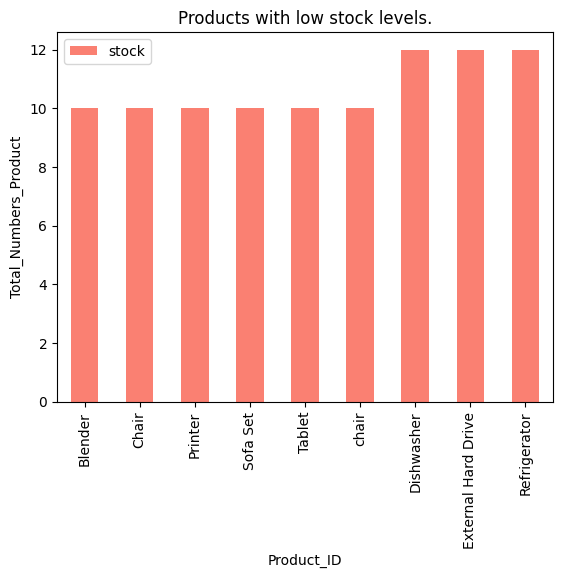

In [105]:
#Create a bar plot to visualize products with low stock levels
low_stock_products.plot(kind='bar',color='Salmon')
plt.title("Products with low stock levels.")
plt.xlabel("Product_ID")
plt.ylabel("Total_Numbers_Product")
plt.show()

**This bar chart shows that which products have low stock levels . This suggests that these items may need to be restocked soon.**

<h3>4.Calculate the average, maximum, and minimum selling prices for products</h3>

In [106]:
#Calculate and print the average, maximum, and minimum selling prices in 'product_df'
avarage_price=product_df['selling_price'].mean()
maximum_price=product_df['selling_price'].max()
minimum_price=product_df['selling_price'].min()
print(avarage_price)
print(maximum_price)
print(minimum_price)

17774.62262295082
70000.0
450.0


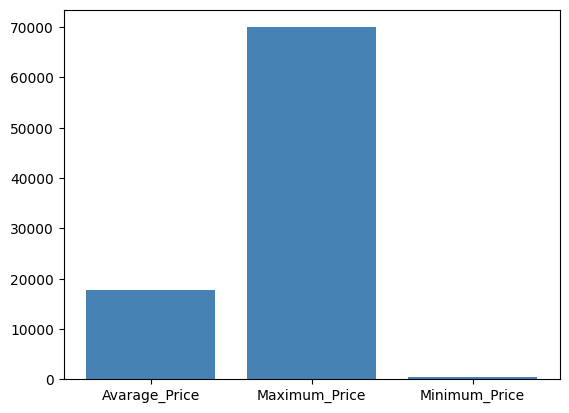

In [107]:
#Create a bar plot to visualize average, maximum, and minimum selling price categories.
price_category=(["Avarage_Price","Maximum_Price","Minimum_Price"])
price=([avarage_price,maximum_price,minimum_price])
plt.bar(price_category,price,color='SteelBlue')
plt.show()

This bar chat shows that **maximum price** is *70000.0* & **minimum price** is *450.0*

<h2>Order Analysis :</h2>

<h3>1.Calculate the top 10 orders product wise 
</h3>

In [108]:
#Display the first few rows of the ecommece Table from Ecommerce database
ecommerce_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000


In [109]:
#Group by 'product_name' and count the number of orders for each product, then select the top 10.
top_orders=ecommerce_df.groupby('product_name')['order_id'].count().nlargest(10)
print(top_orders)

product_name
Tablet             5
Vacuum Cleaner     4
Air Purifier       3
Chair              3
Coffee Maker       3
Digital Camera     3
Smartwatch         3
Television         3
Unknown Product    3
Blender            2
Name: order_id, dtype: int64


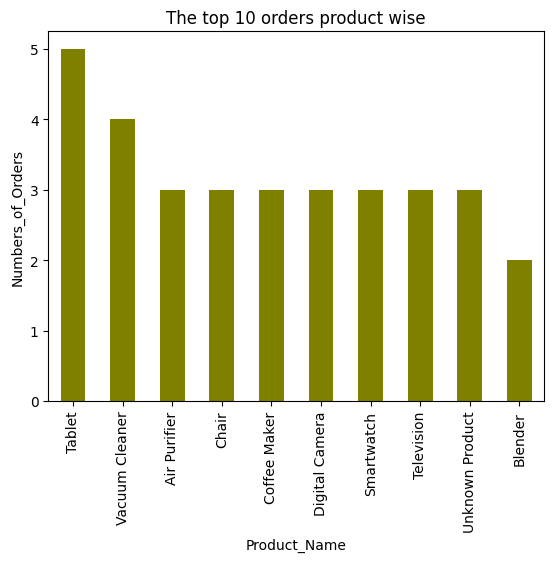

In [110]:
#Create a bar plot to visualize the top 10 orders product-wise.
top_orders.plot(kind='bar',color='Olive')
plt.title("The top 10 orders product wise")
plt.xlabel("Product_Name")
plt.ylabel("Numbers_of_Orders")
plt.show()


The bar chart titled "Top 10 Products by Total Orders" shows the number of orders for various produc where **Tablet** is 5 , **Vacuum Cleaners** is 4, **Air Purifiers, Chairs, Coffee Makers, Digital Cameras, Televisions and Smartwatches** is 3 and **Blenders** is 2 orderss2 each

This suggests that tablets are currently the most popular product, while Bluetooth Speakers and Blenders are less ordered.


<h3>2.Analyze the order status distribution (e.g., pending, delivered)</h3>

In [111]:
#Display the first few rows of the order Table from Ecommerce database
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,Delivered


In [112]:
#Create a pivot table to count the occurrences of each order status in 'order_df'.
order_df_distribution=pd.pivot_table(order_df,index=['order_status'],values=['order_id'],aggfunc='count')
print(order_df_distribution)

              order_id
order_status          
Cancelled            6
Delivered           28
Pending             25
Returned             1
Shipped             16


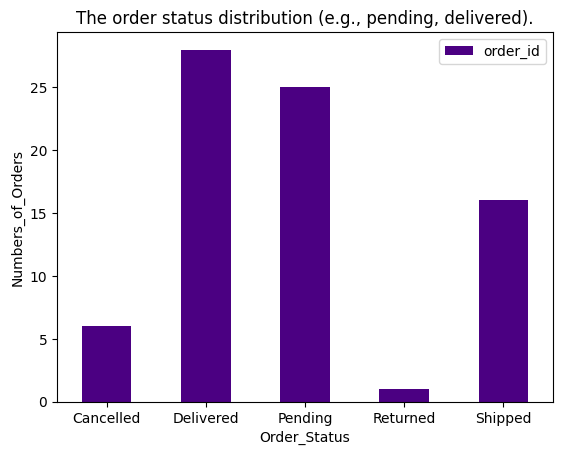

In [160]:
#Create a bar plot to visualize the distribution of order statuses in 'order_df'.
order_df_distribution.plot(kind='bar',color='Indigo')
plt.title("The order status distribution (e.g., pending, delivered).")
plt.xlabel("Order_Status")
plt.xticks(rotation=0)
plt.ylabel("Numbers_of_Orders")
plt.show()

Here we can see that Number of Orders is **Cancelled-6**, **Delivered-28**, **Pending-25**, **Returned-1**, **Shipped-16**

<h3>3.Identify the most popular products based on order quantity</h3>

In [114]:
popular_product_quantity=ecommerce_df.groupby('product_name')['quantity'].count().nlargest(10)
print(popular_product_quantity)

product_name
Tablet             5
Vacuum Cleaner     4
Air Purifier       3
Chair              3
Coffee Maker       3
Digital Camera     3
Smartwatch         3
Television         3
Unknown Product    3
Blender            2
Name: quantity, dtype: int64


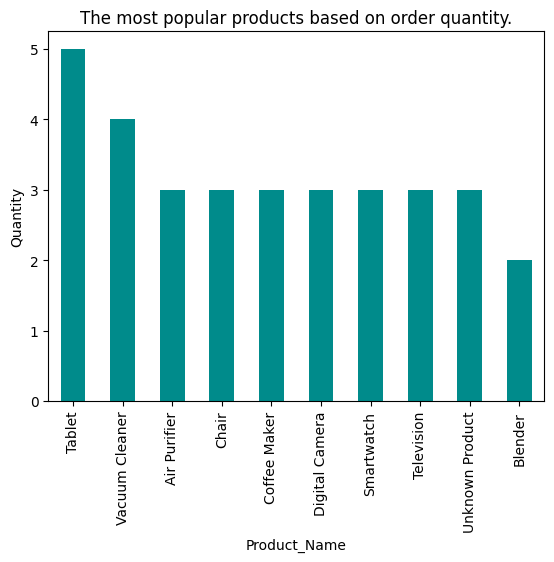

In [115]:
#Create a bar plot to visualize the most popular products based on order quantity.
popular_product_quantity.plot(kind='bar',color='DarkCyan')
plt.title("The most popular products based on order quantity.")
plt.xlabel("Product_Name")
plt.ylabel("Quantity")
plt.show()

**This suggests that Tablets is currently the most popular products, while other listed products have moderate demand.**

<h2>Sales Analysis : </h2>

In [116]:
#Display the first few rows of the ecommece Table from Ecommerce database.
ecommerce_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000


<h3>1.Calculate total revenue generated from orders product wise.</h3>

In [117]:
#Calculate and create a new column 'Total_Revenue_OP' by multiplying 'total_price' and 'quantity'.
ecommerce_df['Total_Revenue_OP']=ecommerce_df['total_price']*ecommerce_df['quantity']
print(ecommerce_df['Total_Revenue_OP'].head(10))

0    28289.33518
1    28289.33518
2      450.00000
3    55000.00000
4     1000.00000
5    20000.00000
6    20000.00000
7      450.00000
8    55000.00000
9    15000.00000
Name: Total_Revenue_OP, dtype: float64


In [118]:
#Group by 'product_name' and sum the total revenue for each product, then select the top 10
Total_revenue_product_wise=ecommerce_df.groupby('product_name')['Total_Revenue_OP'].sum().nlargest(10)
print(Total_revenue_product_wise)

product_name
Tablet             297000.00000
Television         208000.00000
Sofa Set           180000.00000
Desk               148000.00000
Smartwatch         140000.00000
Vacuum Cleaner     139000.00000
Laptop             110000.00000
Air Purifier       100000.00000
Unknown Product     84868.00554
Microwave           78000.00000
Name: Total_Revenue_OP, dtype: float64


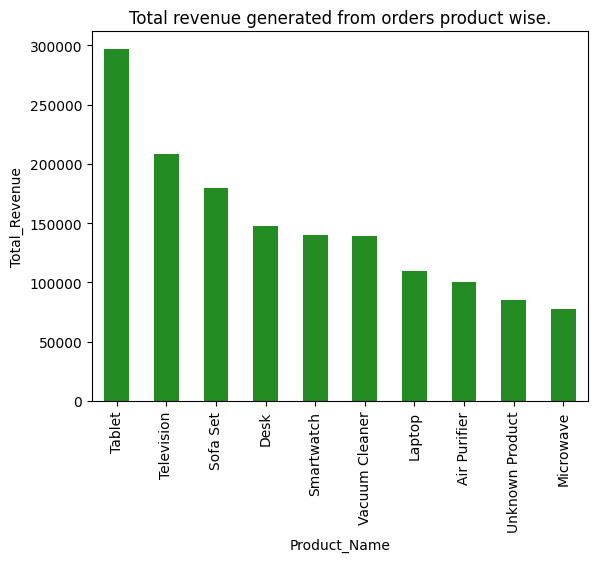

In [119]:
#Create a bar plot to visualize total revenue generated from orders product-wise.
Total_revenue_product_wise.plot(kind='bar',color='ForestGreen')
plt.title("Total revenue generated from orders product wise.")
plt.xlabel("Product_Name")
plt.ylabel("Total_Revenue")
plt.show()

**The chart shows the tablet is the most profitable product, followed by the television.**
**The revenue gap between the tablet and the other products is significant, indicating a high demand for tablets among the customers**

<h3>2.Calculate the total revenue generated from all orders.</h3>

Total revenue all orders product wise : 2369268.005540166


<function matplotlib.pyplot.show(close=None, block=None)>

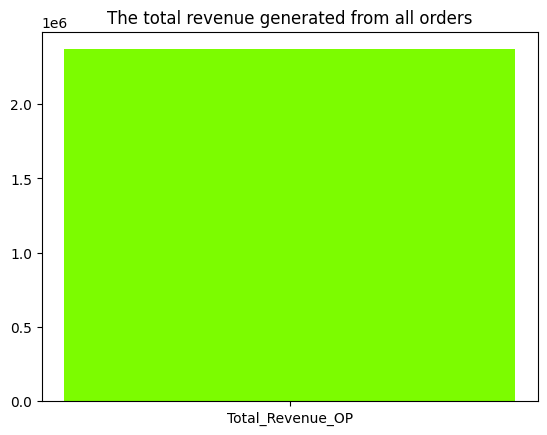

In [120]:
#Calculate and print the total revenue from all orders product-wise
Total_revenue_all_product_wise=ecommerce_df['Total_Revenue_OP'].sum()
print("Total revenue all orders product wise :",Total_revenue_all_product_wise)

#Create a bar plot to visualize the total revenue generated from all orders
plt.bar(['Total_Revenue_OP'], [Total_revenue_all_product_wise], color='LawnGreen')
plt.title('The total revenue generated from all orders')
plt.show

**Total revenue all orders product wise : 2369268.005540166**

<h3>3.Calculate total revenue product category wise percentage. </h3>

In [121]:
#Create a pivot table to count the occurrences of each product category in 'ecommerce_df'.
category_quantity=pd.pivot_table(ecommerce_df,index=['category'],values=['quantity'],aggfunc='count')
print(category_quantity)

             quantity
category             
Appliance          27
Electronics        34
Furniture          15
Unknown             3


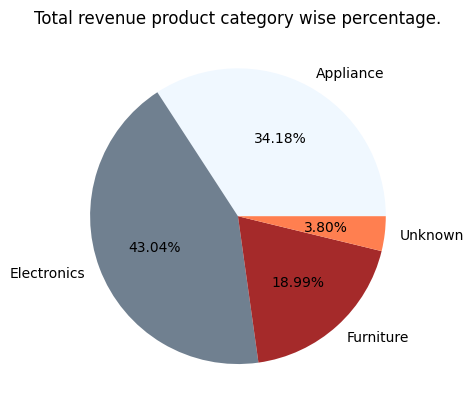

In [122]:
#Flatten the values from the 'category_quantity' pivot table and create a pie chart.
values=category_quantity.values.flatten()
plt.title("Total revenue product category wise percentage.")
plt.pie(values, autopct='%1.2f%%',colors=["AliceBlue","SlateGrey","Brown","Coral"],labels=['Appliance','Electronics','Furniture','Unknown'])
plt.show()

In the above pie chat we can see that **Eloctronics-43.04%**, **Appliance-34.18%**, **Unknown-3.80%**, **Furnture-18.99%**.

<h3>4.Analyze the performance of different product categories in terms of sales.
</h3>

In [123]:
#Group by 'category' and calculate the total sales for each category.
sales_by_category = ecommerce_df.groupby('category')['total_price'].sum()
print(sales_by_category)

category
Appliance      327900.000000
Electronics    829000.000000
Furniture      429500.000000
Unknown         62621.052632
Name: total_price, dtype: float64


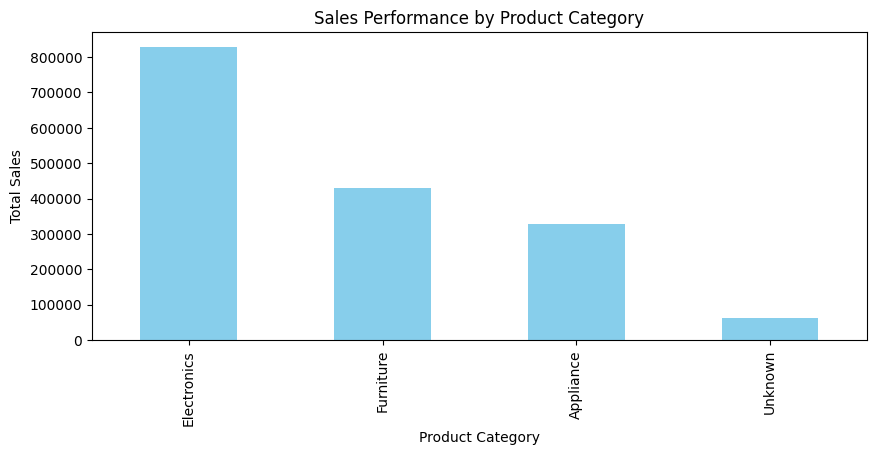

In [133]:
#Create a bar plot to visualize sales performance by product category
plt.figure(figsize=(10, 4))
sales_by_category.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Sales Performance by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

Here from Sales Performance by Product Category chart **Electonics** is the highest selling product and **Unknown** is the lowest.

<h3>5.Identify the most profitable products based on the difference between 
original and selling price. 
</h3>

In [124]:
#Display the first few rows of the 'product_df' DataFrame
product_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,Furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [125]:
#Calculate the price difference between selling_price and original_price and create a new column.
product_df['Diff_Original_Selling']=product_df['selling_price']-product_df['original_price']
print(product_df['Diff_Original_Selling'].head())

0    -5000.00
1    -5000.00
2    -5000.00
3      -50.00
4   -12199.01
Name: Diff_Original_Selling, dtype: float64


product_name
Blender                 -50.0
chair                  -200.0
Desk Lamp              -500.0
Gaming Mouse           -500.0
Portable Speaker       -500.0
Smart Scale            -500.0
Wireless Mouse         -500.0
Car Vacuum            -1000.0
Coffee Maker          -1000.0
Electric Toothbrush   -1000.0
Name: Diff_Original_Selling, dtype: float64


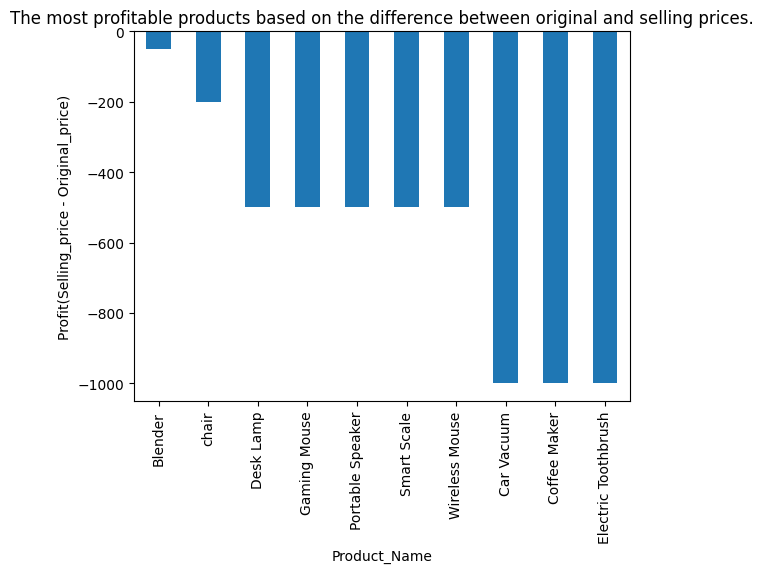

In [126]:
#Group by 'product_name' and find the maximum price difference for each product, then select the top 10 profitable products
profitable_products=product_df.groupby('product_name')['Diff_Original_Selling'].max().nlargest(10)
print(profitable_products)

#Create a bar plot to visualize the most profitable products based on the price difference
profitable_products.plot(kind='bar')
profitable_products.plot(kind='bar')
plt.title("The most profitable products based on the difference between original and selling prices.")
plt.xlabel("Product_Name")
plt.ylabel("Profit(Selling_price - Original_price)")
plt.show()

From the above chart we can see that **Cost Price** is negetive

<h2>Customer Order Patterns :</h2>

<h3>1.Identify product names with the highest and lowest order quantities.
</h3>

In [127]:
#Display the first few rows of the 'ecommerce_df' DataFrame
ecommerce_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price,Total_Revenue_OP
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000,450.00000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000,55000.00000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000,1000.00000


In [135]:
#Create a pivot table to sum the quantities ordered for each product in 'ecommerce_df'
product_order=pd.pivot_table(ecommerce_df,index=['product_name'],values=['quantity'],aggfunc='sum')
print(product_order)

                     quantity
product_name                 
Air Purifier         4.000000
Blender              2.000000
Bluetooth Speaker    3.000000
Car Vacuum           2.000000
Chair                3.000000
Coffee Maker         4.000000
Desk                 4.000000
Desk Lamp            4.000000
Digital Camera       3.000000
Dining Table         2.000000
Dishwasher           1.000000
Electric Toothbrush  1.000000
External Hard Drive  2.000000
Fitness Tracker      4.000000
Gaming Console       2.000000
Gaming Mouse         1.000000
Headphones           3.000000
Laptop               2.000000
Microwave            4.000000
Microwave Oven       2.000000
Monitor              1.000000
Portable Charger     1.000000
Portable Speaker     1.000000
Printer              3.000000
Projector            1.000000
Recliner             1.000000
Refrigerator         3.000000
Smart Scale          1.000000
Smart Speaker        1.000000
Smartwatch           5.000000
Sofa                 3.000000
Sofa Set  

<h3>2.Determine the most preferred payment modes.
</h3>


payment_mode
Online    44
COD       35
Name: count, dtype: int64


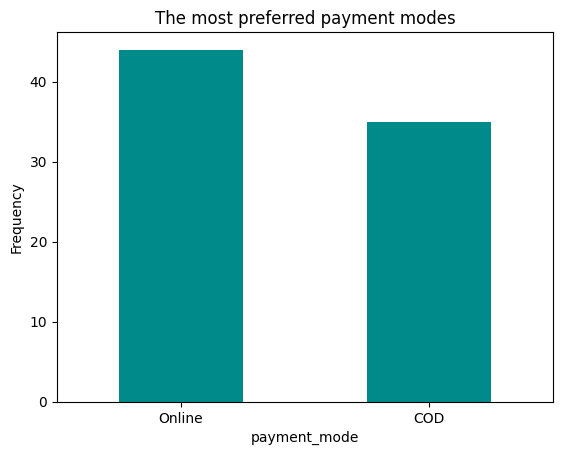

In [129]:
#Count the occurrences of each payment mode and create a bar plot.
preferred_pay_mode=ecommerce_df['payment_mode'].value_counts()
print(preferred_pay_mode)

preferred_pay_mode.plot(kind='bar',color='DarkCyan')
plt.title('The most preferred payment modes')
plt.xlabel('payment_mode')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Here we see that The most preferred payment mode is **Online** 

<h2>Time-based Analysis :</h2>

<h3>1.Month wise total sales.
</h3>

In [163]:
#Convert 'order_date' to datetime and create a new column 'order_month' with month names
ecommerce_df['order_month']=pd.to_datetime(ecommerce_df['order_date'])
ecommerce_df['order_month']=ecommerce_df['order_month'].dt.strftime('%B')
print(ecommerce_df['order_month'])

0     December
1     December
2     December
3     December
4     November
        ...   
74       March
75       March
76       March
77       March
78       March
Name: order_month, Length: 79, dtype: object


In [166]:
#Create a pivot table to sum the total sales for each month in 'ecommerce_df'
Month_wise_sale=pd.pivot_table(ecommerce_df,index=['order_month'],values=['total_price'],aggfunc='sum')
print(Month_wise_sale)

               total_price
order_month               
December     492071.052632
February     446000.000000
January      503000.000000
March        186500.000000
November      21450.000000


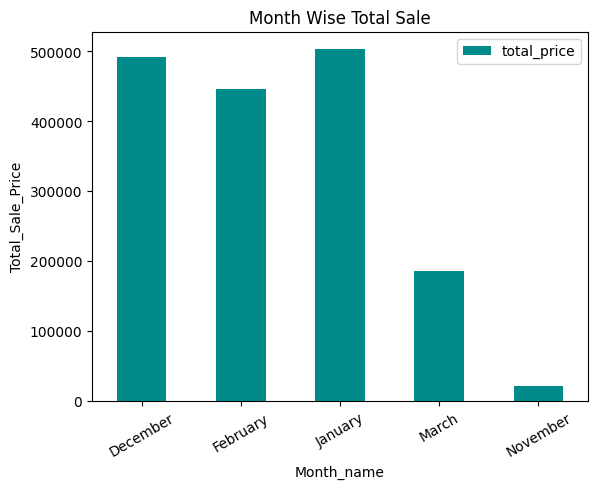

In [167]:
#Create a bar plot to visualize month-wise total sales
Month_wise_sale.plot(kind='bar',color='DarkCyan')
plt.title('Month Wise Total Sale')
plt.xlabel('Month_name')
plt.xticks(rotation=30)
plt.ylabel('Total_Sale_Price')
plt.show()

<h3>2.Month and year wise total sales.
</h3>

In [168]:
#Convert 'order_date' to datetime and create a new column 'month_year' with year and month names
ecommerce_df['month_year']=pd.to_datetime(ecommerce_df['order_date'])
ecommerce_df['month_year']=ecommerce_df['month_year'].dt.strftime('%Y-%B')
print(ecommerce_df['month_year'])

0     2023-December
1     2023-December
2     2023-December
3     2023-December
4     2023-November
          ...      
74       2024-March
75       2024-March
76       2024-March
77       2024-March
78       2024-March
Name: month_year, Length: 79, dtype: object


In [169]:
#Create a pivot table to sum the total sales for each month-year in 'ecommerce_df'
month_year_wise_sale=pd.pivot_table(ecommerce_df,index=['month_year'],values=['total_price'],aggfunc='sum')
print(month_year_wise_sale)

                 total_price
month_year                  
2023-December  492071.052632
2023-November   21450.000000
2024-February  446000.000000
2024-January   503000.000000
2024-March     186500.000000


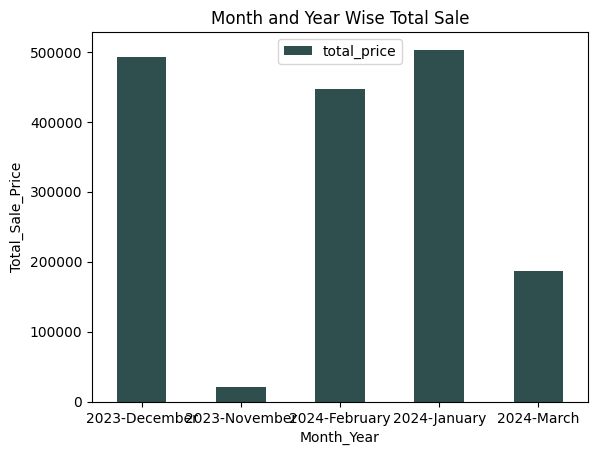

In [171]:
#Create a bar plot to visualize month-year-wise total sales
month_year_wise_sale.plot(kind='bar',color='DarkSlateGrey')
plt.title('Month and Year Wise Total Sale')
plt.xlabel('Month_Year')
plt.xticks(rotation=0)
plt.ylabel('Total_Sale_Price')
plt.show()

<h3>3.Identify peak order date.
</h3>

order_date
2023-11-23    1
2023-11-30    2
2023-12-01    1
2023-12-08    1
2023-12-15    1
             ..
2024-03-17    1
2024-03-18    1
2024-03-19    1
2024-03-20    1
2024-03-21    1
Name: count, Length: 75, dtype: int64


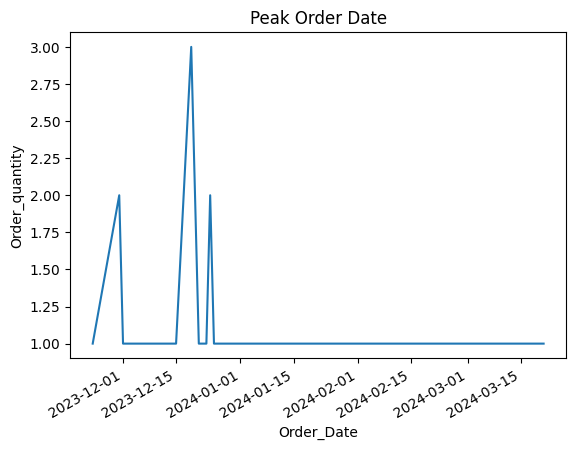

In [172]:
date_wise_order=ecommerce_df['order_date'].value_counts().sort_index()
print(date_wise_order)
date_wise_order.plot(kind='line',xlabel='Order_Date',ylabel='Order_quantity')
plt.title('Peak Order Date')
plt.show()

<h2>Geographical Analysis:</h2>

<h3>1.Explore the distribution of customers across different cities.
</h3>

city
Kanagawa            25
Tokyo               24
Sydney              15
Lake Buena Vista    15
Name: count, dtype: int64


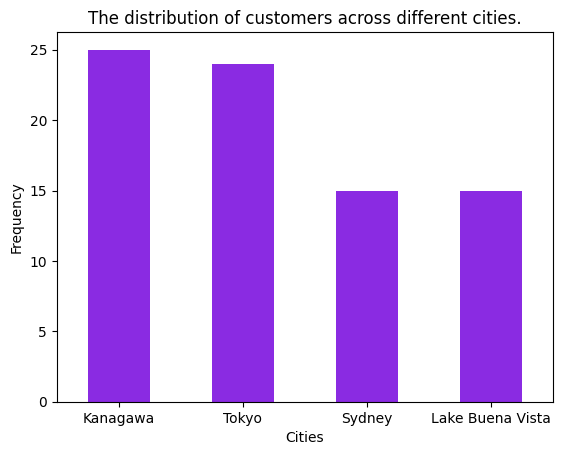

In [146]:
#Count the occurrences of customers in each city and create a bar plot.
customer_city=ecommerce_df['city'].value_counts()
print(customer_city)

customer_city.plot(kind='bar',color='BlueViolet')
plt.title('The distribution of customers across different cities.')
plt.xlabel('Cities')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

<h3>2.Analyze whether certain products or categories are more popular in a
specific city.
</h3>

In [147]:
#Create a pivot table to count the occurrences of each category based on city in 'ecommerce_df'
category_basedon_city=pd.pivot_table(ecommerce_df,index=['city','category'],values=['quantity'],aggfunc='count')
print(category_basedon_city)

                              quantity
city             category             
Kanagawa         Appliance           8
                 Electronics        11
                 Furniture           6
Lake Buena Vista Appliance           4
                 Electronics         7
                 Furniture           4
Sydney           Appliance           5
                 Electronics         7
                 Furniture           2
                 Unknown             1
Tokyo            Appliance          10
                 Electronics         9
                 Furniture           3
                 Unknown             2


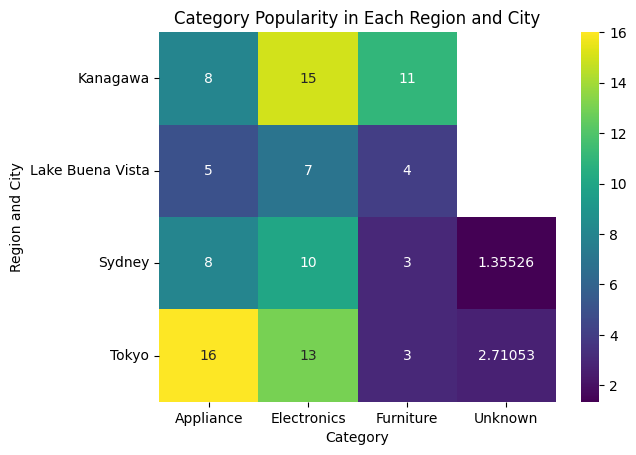

In [148]:
#Group by 'city' and 'category', sum the quantities, and create a heatmap
city_product_popularity = ecommerce_df.groupby(['city', 'category'])['quantity'].sum().unstack()
sns.heatmap(city_product_popularity, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': ''})
plt.title('Category Popularity in Each Region and City')
plt.xlabel('Category')
plt.ylabel('Region and City')
plt.yticks(rotation=0)
plt.show()

<h2>Product Performance:</h2>

In [153]:
#Display the first few rows of the 'product_df' DataFrame.
ecommerce_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price,Total_Revenue_OP
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000,450.00000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000,55000.00000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000,1000.00000


<h3>1.Identify the top 10 best-selling products.
</h3>

In [154]:

Top_ten_selling=pd.pivot_table(ecommerce_df,index=['product_name'],values=['quantity'],aggfunc='max').nlargest(10,('quantity'))
print(Top_ten_selling)

                   quantity
product_name               
Desk Lamp               3.0
Microwave               3.0
Smartwatch              3.0
Air Purifier            2.0
Bluetooth Speaker       2.0
Car Vacuum              2.0
Coffee Maker            2.0
Desk                    2.0
Fitness Tracker         2.0
Headphones              2.0


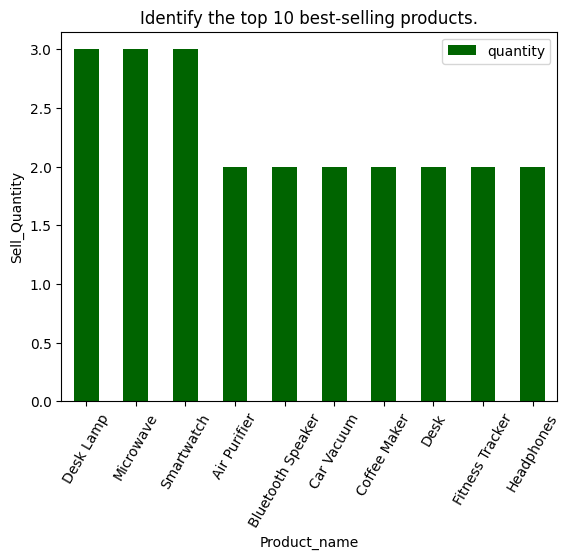

In [157]:
Top_ten_selling.plot(kind='bar',color='darkgreen')
plt.title('Identify the top 10 best-selling products.')
plt.xlabel('Product_name')
plt.xticks(rotation=60)
plt.ylabel('Sell_Quantity')
plt.show()

<h3>2.Identify top 10 slow-moving products based on low sales.
</h3>

In [155]:
Bottom_ten_selling=pd.pivot_table(ecommerce_df,index=['product_name'],values=['quantity'],aggfunc='min').nsmallest(10,('quantity'))
print(Bottom_ten_selling)

                     quantity
product_name                 
Air Purifier              1.0
Blender                   1.0
Bluetooth Speaker         1.0
Chair                     1.0
Coffee Maker              1.0
Desk Lamp                 1.0
Digital Camera            1.0
Dining Table              1.0
Dishwasher                1.0
Electric Toothbrush       1.0


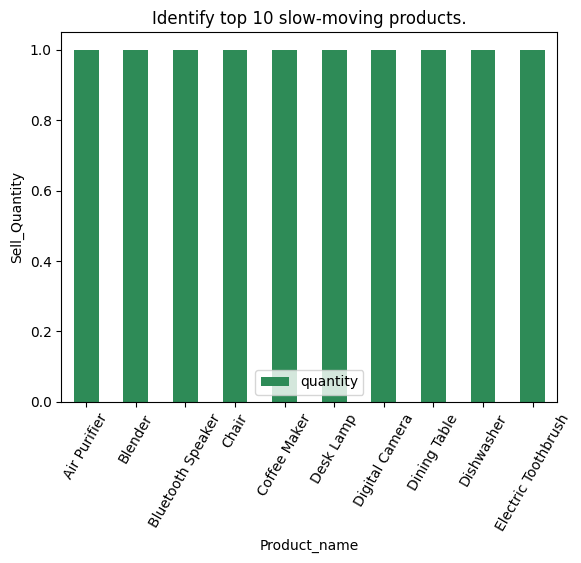

In [156]:
Bottom_ten_selling.plot(kind='bar',color='seagreen')
plt.title('Identify top 10 slow-moving products.')
plt.xlabel('Product_name')
plt.xticks(rotation=60)
plt.ylabel('Sell_Quantity')
plt.show()

<h2>Customer Retention:</h2>

<h3>1.Analyze repeat customers and their order patterns.</h3>

In [173]:
repeat_customer=ecommerce_df['customer_name'].value_counts().gt(1).value_counts()
print(repeat_customer)

count
False    20
True     19
Name: count, dtype: int64


In [174]:
ecommerce_df['customer_name'].value_counts()

customer_name
Mia          5
Ava          5
Oliver       5
Ethan        4
Sophia       4
Emma         4
William      3
Evelyn       3
Alexander    3
Harper       3
Henry        3
Jack         3
Wyatt        2
Peter        2
James        2
Olivia       2
Lucas        2
Liam         2
Aria         2
Aiden        1
Elijah       1
Noah         1
Luna         1
Logan        1
Sofia        1
Carter       1
Elena        1
Steve        1
Avery        1
Chloe        1
Scarlett     1
Benjamin     1
Michael      1
john         1
Lucy         1
Leo          1
lilly        1
Jackson      1
Isabella     1
Name: count, dtype: int64

               quantity
customer_name          
Alexander             3
Aria                  2
Ava                   5
Emma                  4
Ethan                 4
Evelyn                3
Harper                3
Henry                 3
Jack                  3
James                 2
Liam                  2
Lucas                 2
Mia                   5
Oliver                5
Olivia                2
Peter                 2
Sophia                4
William               3
Wyatt                 2


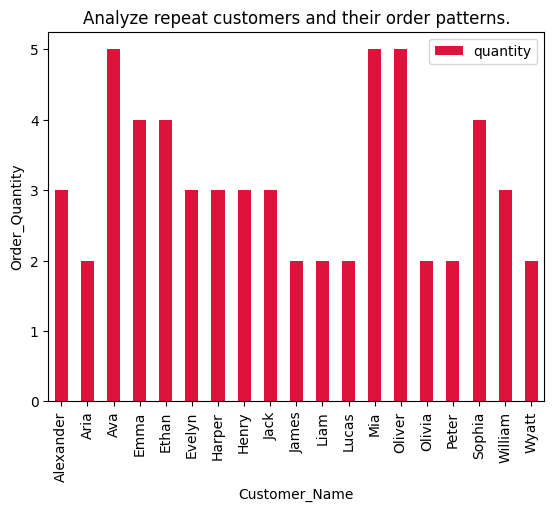

In [175]:
# Assuming 'quantity' is the column you are interested in
repeat_customer_pivot_table= pd.pivot_table(ecommerce_df, index='customer_name', values='quantity', aggfunc='count')
# Filter rows where the count is greater than 1
filtered_repeat_customer_pivot_table = repeat_customer_pivot_table[repeat_customer_pivot_table['quantity'] > 1]
print(filtered_repeat_customer_pivot_table)
filtered_repeat_customer_pivot_table.plot(kind='bar',color='Crimson')
plt.xlabel('Customer_Name')
plt.ylabel('Order_Quantity')
plt.title('Analyze repeat customers and their order patterns.')
plt.show()

<h2>Payment Analysis:
</h2>

<h3>Display successful and pending payments order counts.</h3>

In [151]:
#Display the first few rows of the 'ecommerce_df' DataFrame.
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,Delivered


order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64


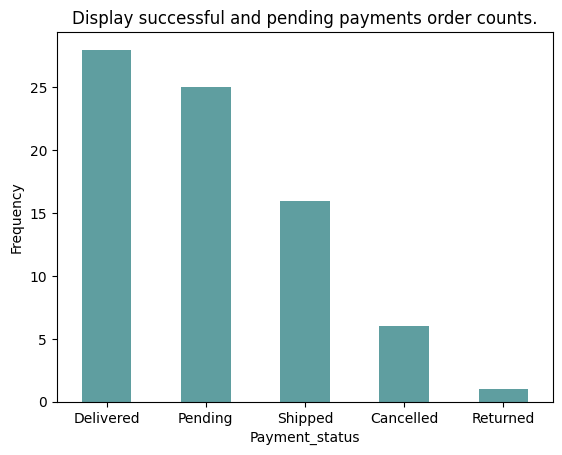

In [152]:
#Count the occurrences of each order status in 'order_df' and create a bar plot.
payment_order_status=order_df['order_status'].value_counts()
print(payment_order_status)

payment_order_status.plot(kind='bar',color='CadetBlue')
plt.title('Display successful and pending payments order counts.')
plt.xlabel('Payment_status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


<h1>Conclusion :</h1>


Tokyo has the maximum number of the customers whereas Lake Buena Vista has the minimum number of customer. Electronic category has the maximum number of products available whereas Furniture category has the minimum. Electronic sub-cateory has the maximum number of products followed by Computer, Wearables and so on. The Average Price is 17774.62, Maximum Price is 70000 and Minimum Price is 450. Tablet is the most ordered product followed by Vacuum Cleaner, Air Purifier, Chair and so on. Most of the products have been delivered, some of are pending, few have been cancelled. Tablet and Vacuum Cleaner aren of the most popular prod followed by Smartwatch, Air Purifier and so on. The total revenue is 1586400. The Electronic category has the heighest revenue percentage. Coffee Maker is the most profitable product. Tablet is the heighest ordered product whereas Didhwasher is the lowest ordered product. Heighest order has been done by Oliver. Most of the customer prefers the Online payment mode. The most sell has done in January,2024. Heighest order placed at 1st December of 2023. Most of the customer are from Tokyo. Products from the Eletronic category have been sold in higher quantities in all regions. Products from Appliance category have been sold mostly in Tokyo city. Furniture have been sold mostly in Kanagawa city. Tablet and Vacuuum Cleaner sold the most. Then Smartwatch, Air Purifier and so on. Dishwash, Eletric Toothbrush, Gaming Mouse, Monitor, Portable Charger, Projector, Recliner, Smart Scale, Smart Speaker are the most slow moving products. Oliver is the most repeated customer. Retention rates were higher between the time period of December 2023 to January 2024. Most of the orders have been successfully delivered. d growth.